Nouvelle version Modèle NoN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix,classification_report
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard


In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root' *
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'*
,'srv_serror_rate'*
,'rerror_rate'*
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'*
,'dst_host_srv_count'
,'dst_host_same_srv_rate'*
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'*
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'*
,'dst_host_srv_rerror_rate'*
,'attack-type'
,'level'])
df_train=pd.read_csv('/content/KDDTrain+.txt',header=None,names=columns)
df_test=pd.read_csv('/content/KDDTest+.txt',header=None,names=columns)

In [ ]:
df_train.shape[0]+df_test.shape[0]

148517

In [ ]:
df=pd.concat([df_train,df_test])

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack-type', 'level'],
      dtype='object')

In [ ]:
liste_services=list(df['service'].unique())
df['service'].nunique()

70

In [ ]:
dico_protocol={'tcp':1,'udp':2,'icmp':3}
dico_flag= {'SF': 7,
 'S0': 2,
 'REJ': 10,
 'RSTR': 9,
 'SH': 8,
 'RSTO': 5,
 'S1': 4,
 'RSTOS0': 3,
 'S3': 6,
 'S2': 11,
 'OTH': 1}

dico_service={'ftp_data': 5,
 'other': 30,
 'private': 34,
 'http': 50,
 'remote_job': 3,
 'name': 57,
 'netbios_ns': 21,
 'eco_i': 44,
 'mtp': 12,
 'telnet': 26,
 'finger': 10,
 'domain_u': 49,
 'supdup': 16,
 'uucp_path': 25,
 'Z39_50': 23,
 'smtp': 39,
 'csnet_ns': 36,
 'uucp': 19,
 'netbios_dgm': 33,
 'urp_i': 22,
 'auth': 40,
 'domain': 52,
 'ftp': 14,
 'bgp': 58,
 'ldap': 46,
 'ecr_i': 11,
 'gopher': 4,
 'vmnet': 64,
 'systat': 55,
 'http_443': 42,
 'efs': 65,
 'whois': 1,
 'imap4': 38,
 'iso_tsap': 32,
 'echo': 61,
 'klogin': 45,
 'link': 24,
 'sunrpc': 54,
 'login': 43,
 'kshell': 13,
 'sql_net': 31,
 'time': 7,
 'hostnames': 59,
 'exec': 2,
 'ntp_u': 29,
 'discard': 28,
 'nntp': 9,
 'courier': 66,
 'ctf': 48,
 'ssh': 63,
 'daytime': 56,
 'shell': 69,
 'netstat': 67,
 'pop_3': 41,
 'nnsp': 51,
 'IRC': 17,
 'pop_2': 47,
 'printer': 27,
 'tim_i': 20,
 'pm_dump': 35,
 'red_i': 70,
 'netbios_ssn': 6,
 'rje': 18,
 'X11': 53,
 'urh_i': 8,
 'http_8001': 68,
 'aol': 62,
 'http_2784': 15,
 'tftp_u': 37,
 'harvest': 60}

In [ ]:
df['protocol_type']=df['protocol_type'].map(dico_protocol)
df['flag']=df['flag'].map(dico_flag)
df['service']=df['service'].map(dico_service)

In [ ]:
df.drop('level',axis=1,inplace=True)

In [ ]:
# On définit une fonction qui retourne 0 pour un état normal et 1 s'il s'agit d'une attaque
def normal_or_not(state):
    if(state=="normal"):
        return 0
    else:
        return 1

In [ ]:
df.to_csv('df_pretraite.csv',index=False)

In [ ]:
df=pd.read_csv('df_pretraite.csv')

In [ ]:
df.shape

(148517, 42)

In [ ]:
df['attack-type']=df['attack-type'].apply(normal_or_not)

<Axes: xlabel='attack-type', ylabel='count'>

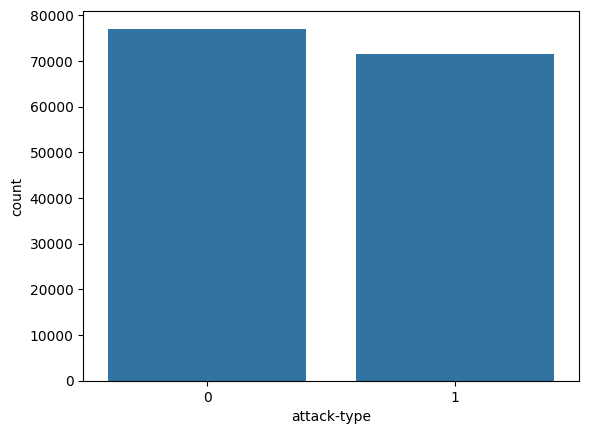

In [ ]:
sns.countplot(x='attack-type',data=df)

In [ ]:
df.drop(['num_outbound_cmds'],axis=1,inplace=True)

<Axes: >

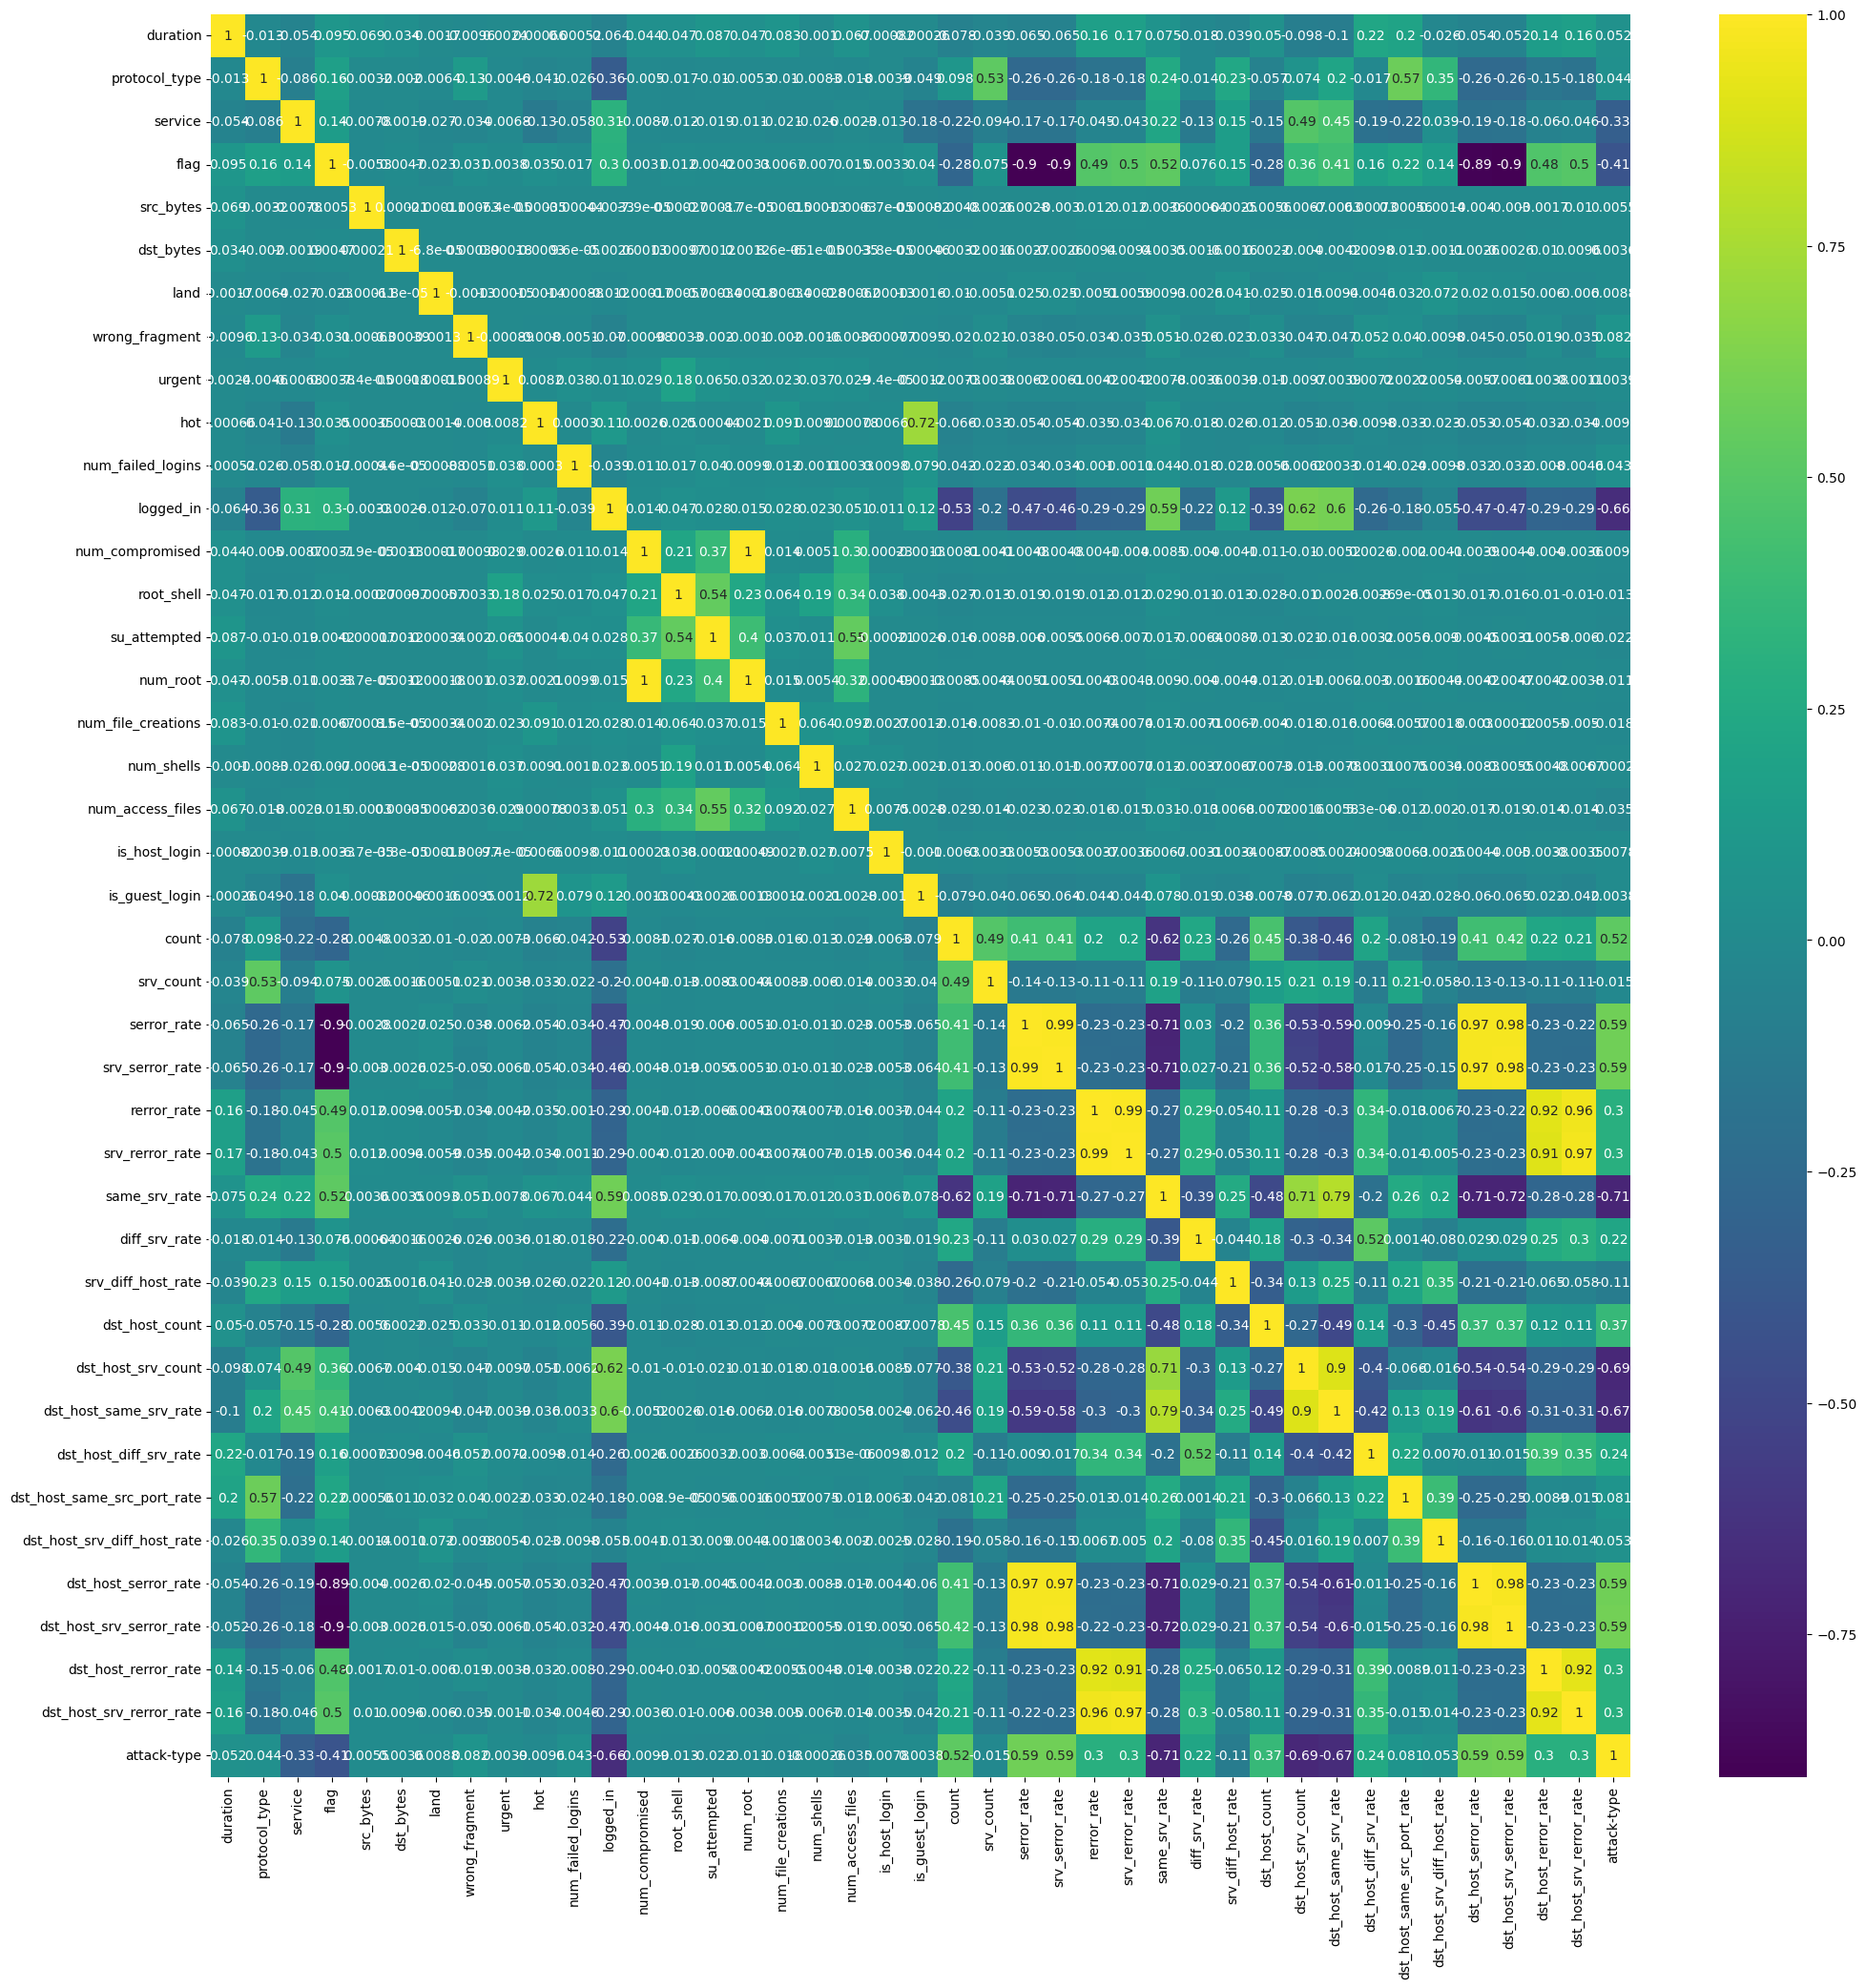

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [ ]:
df.drop(['serror_rate','dst_host_serror_rate','srv_serror_rate','num_root','rerror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_same_srv_rate','dst_host_count'],axis=1,inplace=True)

In [ ]:
df.shape

(148517, 32)

In [ ]:
X=df.drop('attack-type',axis=1).values
y=df['attack-type'].values

In [ ]:
X.shape

(148517, 40)

In [ ]:
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
log_directory='logs\\fit'
timestamp=datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory=log_directory+'\\'+timestamp
board= TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True, write_images=True, update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [ ]:
# normal_or_not
model=Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=y_train,epochs=300, batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop,board])

Epoch 1/300
465/465 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7906 - loss: 0.4336 - val_accuracy: 0.9421 - val_loss: 0.1768
Epoch 2/300
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9436 - loss: 0.2023 - val_accuracy: 0.9566 - val_loss: 0.1345
Epoch 3/300
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9557 - loss: 0.1609 - val_accuracy: 0.9607 - val_loss: 0.1084
Epoch 4/300
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9609 - loss: 0.1329 - val_accuracy: 0.9651 - val_loss: 0.0846
Epoch 5/300
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9671 - loss: 0.1099 - val_accuracy: 0.9701 - val_loss: 0.0737
Epoch 6/300
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9710 - loss: 0.0961 - val_accuracy: 0.9763 - val_loss: 0.0639
Epoch 7/300
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9741 - loss: 0.0861 - val_accuracy: 0.9801 - val_loss: 0.0605
Epoch 8/300
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9744 - loss: 0.0808 - val_accu

Evaluation des performances

In [ ]:
losses_NoN=pd.DataFrame(model.history.history)

In [ ]:
epoch_NoN=len(losses_NoN)

<Axes: >

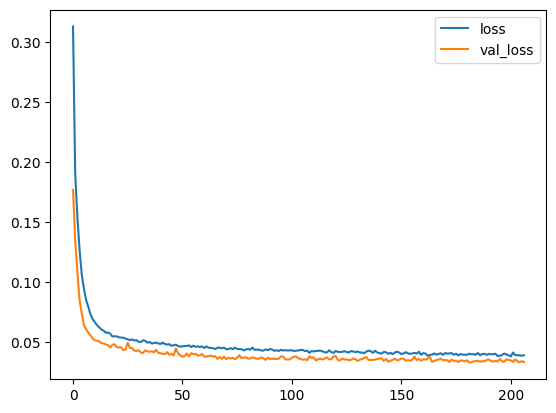

In [ ]:
losses_NoN[['loss','val_loss']].plot()

<Axes: >

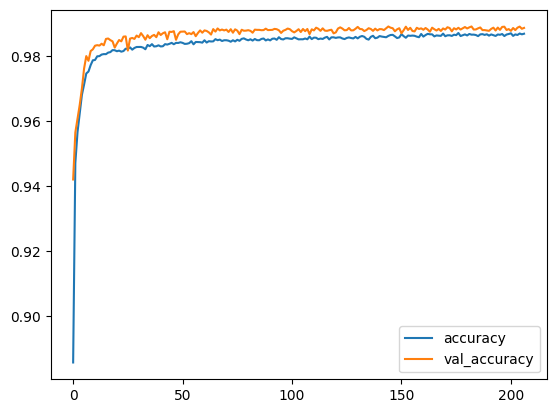

In [ ]:
losses_NoN[['accuracy','val_accuracy']].plot()

In [ ]:
predictions_NoN=(model.predict(X_test)>0.5).astype('int32')

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(classification_report(y_test,predictions_NoN))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15439
           1       0.99      0.99      0.99     14265

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704



In [ ]:
confusion_matrix(y_test,predictions_NoN)

array([[15291,   148],
       [  185, 14080]])

In [ ]:
model.save('MNoN.h5')

In [ ]:
model.save('MNoN.keras')

In [ ]:
from joblib import dump

In [ ]:
dump(scaler,'scaler_MNoN.pkl')

['scaler_MNoN.pkl']